# Programming for Data Applications (LDSCI7234)

### Analysing Quantitative Data using Python

#### Student ID: 23220052

Before starting the assignment, we will be importing all libraries and packages required for our programme solution

- "import csv" module to work with Comma Separated Values files as well as read and write tabular data in CSV format (Python documentation, 2024)
- "import pandas as pd" library to manipulate and analyse data (W3 School, 2024)
- "import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn documentation, 2024)
- "import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib documentation, 2024)
- import "string" module to check if a character, slice, or string contains letters, digits, symbols (Pankaj, 2022)

In [1]:
#We first import all libraries and packages 

import csv
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import string

### I - Data Loading (10 Marks)

- Download the dataset and load the file into a notebook in JupyterLab.


Although we planned to download our dataset programmatically, some restrictions forced manual downloading. After saving our dataset in our JupyterLab notebook, we aimed at loading it, making it ready for further operations. 

In [2]:
#We first load the data from our Excel file
file_name = pd.ExcelFile("babynames1996to2021 2.xlsx")

### II - Data Cleaning and Preprocessing (20 Marks)

1. Load data from Excel File

Prior to performing data cleaning and preprocessing, we want to load our data from the corresponding excel file. 
Please note that this has already been done in Q1 (without using functions).

To do that, we first define our load_function.

In [3]:
def load_function(excel_filename, sheet_names):
    """
    Load specific sheets from an Excel file into pandas dataframes.
    
    """
    file_name = pd.ExcelFile(excel_filename)
    dataframes = {}
    for sheet_name in sheet_names:
        dataframes[sheet_name] = pd.read_excel(file_name, sheet_name=sheet_name)
    return dataframes

Now we run our load_function for our specific dataset.

In [4]:
#We first define the filename of our specific dataset Excel file
excel_filename = "babynames1996to2021 2.xlsx"

#We also define the names of the sheets to be loaded from the Excel file
sheet_names = ["1", "2"]

#And load our specific sheets from the Excel file into pandas dataframes
loaded_data = load_function(excel_filename, sheet_names)

#Then, we access the loaded data:
#We get the dataframe containing male baby names
male_babynames = loaded_data["1"]

#And the one containing female baby names
female_babynames = loaded_data["2"]

#We print the first 10 rows of male baby names dataframe
print("Male Baby Names:")
print(male_babynames.head(10))

#As well as the 10 rows of female baby names dataframe
print("\nFemale Baby Names:")
print(female_babynames.head(10))


Male Baby Names:
  Worksheet 1: Names for baby boys England and Wales, 1996 to 2021 [note 1] [note 2]  \
0                  This worksheet contains one table                                   
1  Some cells refer to notes which can be found o...                                   
2                                              Notes                                   
3  Some shorthand is used in this table, [x] = no...                                   
4                        [note 1] refers to cell A8.                                   
5             Source: Office for National Statistics                                   
6                                               Name                                   
7                                                  A                                   
8                                              A-Jay                                   
9                                               A.J.                                   

  Unnamed: 1  

2. Combine and transform the ONS Spreadsheet into an appropriate format for analysis

Now that we loaded our data, we decide to transform our spreadsheets into two separated CSV files. To do that, we first define our csv_function.

In [5]:
def csv_function(male_df, female_df, male_filename="male_babynames.csv", female_filename="female_babynames.csv"):
    """
    Save male and female baby names dataframes to CSV files.
    
    """
    #We save male baby names dataframe to CSV
    male_df.to_csv(male_filename, index=False)

    #Then, we save female baby names dataframe to CSV
    female_df.to_csv(female_filename, index=False)

Now we run our csv_function to get our specific csv files:

In [6]:
csv_function(male_babynames, female_babynames)

In [7]:
male_babynames

,"Worksheet 1: Names for baby boys England and Wales, 1996 to 2021 [note 1] [note 2]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,This worksheet contains one table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Some cells refer to notes which can be found o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Some shorthand is used in this table, [x] = no...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[note 1] refers to cell A8.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,Zylan,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16780,Zylus,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16781,Zyon,1448,17,1548,15,1655,14,2259,9,3449,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16782,Zyren,[x],[x],[x],[x],[x],[x],[x],[x],4812,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]


In [8]:
female_babynames

,"Worksheet 2: Names for baby girls England and Wales, 1996 to 2021 [note 1] [note 2]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,This worksheet contains one table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Some cells refer to notes which can be found o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Some shorthand is used in this table, [x] = no...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[note 1] refers to cell A8.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,Zynah,3961,5,[x],[x],[x],[x],[x],[x],4763,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21961,Zyra,2341,11,2449,10,4001,5,2901,8,4063,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21962,Zyrah,5581,3,4535,4,[x],[x],[x],[x],4763,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21963,Zysha,4634,4,[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]


3. Format any symbols used in the spreadsheet into a appropriate data formats. You must demonstrate the use of appropriate data structures and custom functions for any repeated tasks in this step. These steps should be completed by defining a class to load, clean and return the data for analysis.

We realised that our CSV files contained unnecessary rows at the beggining, as well as symboles within the cell values. Therefore, we need to clean them, to improve accuracy, consistency, and interpretability for performing meaningful analysis and extracting valuable insights.

To do that, we first define our remove_rows function. 

In [9]:
def remove_rows(filename, skip_rows=None, header_row=None):
    if skip_rows:
        data = pd.read_csv(filename, skiprows=skip_rows)
    else:
        data = pd.read_csv(filename)
    
    return data

Now we run our remove_rows function to get our new dataframes without the unnecessary rows.

In [10]:
#We first load our male baby names data from "male_babynames.csv" while skipping rows 0 to 6
male_babynames_df = remove_rows("male_babynames.csv", skip_rows=[0, 1, 2, 3, 4, 5, 6])

#We do the same for the female baby names
female_babynames_df = remove_rows("female_babynames.csv", skip_rows=[0, 1, 2, 3, 4, 5, 6])

#We then print the final male baby names dataframe
print("Male Baby Names after skipping specified rows :")
print(male_babynames_df)

#As well as the final female baby names dataframe
print("\nFemale Baby Names after skipping specified rows :")
print(female_babynames_df)

Male Baby Names after skipping specified rows :
        Name 2021 Rank 2021 Count 2020 Rank 2020 Count 2019 Rank 2019 Count  \
0          A      3451          5      3848          4      2104         10   
1      A-Jay      3451          5      2960          6       [x]        [x]   
2       A.J.       [x]        [x]       [x]        [x]       [x]        [x]   
3      Aaban      3990          4      3848          4      3937          4   
4      Aabid       [x]        [x]      4608          3      3937          4   
...      ...       ...        ...       ...        ...       ...        ...   
16772  Zylan       [x]        [x]       [x]        [x]       [x]        [x]   
16773  Zylus       [x]        [x]       [x]        [x]       [x]        [x]   
16774   Zyon      1448         17      1548         15      1655         14   
16775  Zyren       [x]        [x]       [x]        [x]       [x]        [x]   
16776  Zyron       [x]        [x]      3848          4       [x]        [x]   

   

We print both male_babynames_df and female_babynames_df separately.

In [11]:
male_babynames_df 

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A,3451,5,3848,4,2104,10,3959,4,3996,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,A-Jay,3451,5,2960,6,[x],[x],3011,6,1923,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
2,A.J.,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],2943,3,[x],[x],[x],[x],[x],[x]
3,Aaban,3990,4,3848,4,3937,4,3412,5,2324,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
4,Aabid,[x],[x],4608,3,3937,4,3959,4,3996,...,2142,5,[x],[x],2901,3,[x],[x],[x],[x]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Zylan,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16773,Zylus,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16774,Zyon,1448,17,1548,15,1655,14,2259,9,3449,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
16775,Zyren,[x],[x],[x],[x],[x],[x],[x],[x],4812,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]


In [12]:
female_babynames_df

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,[x],[x],[x],[x],4686,4,[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,A'Isha,5581,3,[x],[x],2458,10,[x],[x],4763,...,[x],[x],[x],[x],3142,4,[x],[x],[x],[x]
2,A'Ishah,4634,4,[x],[x],[x],[x],[x],[x],5765,...,3912,3,3225,4,3142,4,[x],[x],[x],[x]
3,A'Niyah,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
4,Aa'Idah,4634,4,[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,Zynah,3961,5,[x],[x],[x],[x],[x],[x],4763,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21954,Zyra,2341,11,2449,10,4001,5,2901,8,4063,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21955,Zyrah,5581,3,4535,4,[x],[x],[x],[x],4763,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
21956,Zysha,4634,4,[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]


Now we want to remove the "[x]" symbols in our cell values, replacing them by NaN values, as well as convert all the columns (besides the first one) to numeric. To do that, we define our "clean_dataframe" function.

In [13]:
def clean_dataframe(dataframe):
    """
    Clean the given DataFrame by replacing '[x]' with 'NaN' and converting all columns except the first one to numeric.

    """
    #We replace '[x]' with 'NaN'
    cleaned_df = dataframe.replace({'\[x\]': 'NaN'}, regex=True)
    
    #We convert all columns except the first one to numeric
    cleaned_df.iloc[:, 1:] = cleaned_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    return cleaned_df

Then, we run our "clean_dataframe" function to get our new clean dataframes.

In [14]:
#We assume male_babynames_df and female_babynames_df are already defined dataframes

#We clean the male baby names DataFrame
clean_male_babynames_df = clean_dataframe(male_babynames_df)

#As well as the female baby names DataFrame
clean_female_babynames_df = clean_dataframe(female_babynames_df)


We print both clean_male_babynames_df and clean_female_babynames_df separately.

In [15]:
clean_male_babynames_df

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A,3451.0,5.0,3848.0,4.0,2104.0,10.0,3959.0,4.0,3996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Jay,3451.0,5.0,2960.0,6.0,NaN,NaN,3011.0,6.0,1923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A.J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2943.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Aaban,3990.0,4.0,3848.0,4.0,3937.0,4.0,3412.0,5.0,2324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aabid,NaN,NaN,4608.0,3.0,3937.0,4.0,3959.0,4.0,3996.0,...,2142.0,5.0,NaN,NaN,2901.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Zylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16773,Zylus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16774,Zyon,1448.0,17.0,1548.0,15.0,1655.0,14.0,2259.0,9.0,3449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16775,Zyren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4812.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
clean_female_babynames_df

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,NaN,NaN,NaN,NaN,4686.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A'Isha,5581.0,3.0,NaN,NaN,2458.0,10.0,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,3142.0,4.0,NaN,NaN,NaN,NaN
2,A'Ishah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5765.0,...,3912.0,3.0,3225.0,4.0,3142.0,4.0,NaN,NaN,NaN,NaN
3,A'Niyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aa'Idah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,Zynah,3961.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21954,Zyra,2341.0,11.0,2449.0,10.0,4001.0,5.0,2901.0,8.0,4063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21955,Zyrah,5581.0,3.0,4535.0,4.0,NaN,NaN,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21956,Zysha,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we realised that for each year there are two corresponding columns; one for the year rank and the other one for the year count. We decide to drop all the year rank columns as they are unnecessary for the rest of our assignment, and remove the 'count' word within all the remaining columns.

In [17]:
def process_dataframe(dataframe):
    """
    Process the given dataframe by dropping columns containing 'Rank', splitting column names, and renaming columns.

    """
    #We drop columns containing 'Rank'
    processed_df = dataframe.drop(columns=[col for col in dataframe.columns if 'Rank' in col])
    
    #We split column names and rename columns
    processed_df.columns = [col.split()[0] for col in processed_df.columns]
    
    return processed_df

Finally, we call our "process_dataframe" function on our already existing "clean_male_babynames_df" and "clean_female_babynames_df".

In [18]:
#We assume clean_male_babynames_df and clean_female_babynames_df are already defined dataframes
clean_male_babynames_df2 = process_dataframe(clean_male_babynames_df)
clean_female_babynames_df2 = process_dataframe(clean_female_babynames_df)


Finally, we print our "clean_male_babynames_df2" and "clean_female_babynames_df2", which will serve as the basis for our next assignment steps.

In [19]:
clean_male_babynames_df2

,Name,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,A,5.0,4.0,10.0,4.0,4.0,9.0,11.0,6.0,7.0,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1,A-Jay,5.0,6.0,NaN,6.0,12.0,9.0,7.0,4.0,8.0,...,3.0,8.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN
2,A.J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,Aaban,4.0,4.0,4.0,5.0,9.0,3.0,9.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aabid,NaN,3.0,4.0,4.0,4.0,3.0,6.0,3.0,NaN,...,NaN,NaN,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Zylan,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16773,Zylus,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16774,Zyon,17.0,15.0,14.0,9.0,5.0,6.0,4.0,5.0,3.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16775,Zyren,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
clean_female_babynames_df2

,Name,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,A'Idah,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A'Isha,3.0,NaN,10.0,NaN,4.0,9.0,11.0,9.0,5.0,...,3.0,4.0,3.0,NaN,8.0,NaN,NaN,4.0,NaN,NaN
2,A'Ishah,4.0,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,...,5.0,6.0,6.0,5.0,8.0,3.0,4.0,4.0,NaN,NaN
3,A'Niyah,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aa'Idah,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,Zynah,5.0,NaN,NaN,NaN,4.0,NaN,9.0,3.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21954,Zyra,11.0,10.0,5.0,8.0,5.0,NaN,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21955,Zyrah,3.0,4.0,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21956,Zysha,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### III - Data Analysis (30 Marks)

Analyse the dataset to find any trends. You must demonstrate three different forms
of analysis, you may pick from the following list or design your own:

- Names whose popularity has increased or decreased the most in the years covered in the dataset
- Analyse trends in the length of name over time
- What is the most popular first letter for baby names, does it change over time?
- What names are popular with both boys and girls?
- Are there any trends in names changing from being a boy name to a girl name or vice versa over time?
- Are there any trends in name diversity, are people choosing to name their children less common names?

Note that the dataset contains the exact spelling of the name given on the birth
certificate, there are separate entries for names with similar pronunciations.


##### A) What is the most popular first letter for baby names, does it change over time?

Our first analysis consists in identifying the most popular first letter for baby names and understand whether it changes over time. 

To do that, we first group the boys and girls names by letter.

For boys names:

In [21]:
#We initialize an empty dictionary to store the grouped data
boysnames_by_first_letter = {}

#We then group names by the first letter
boys_grouped_by_first_letter = clean_male_babynames_df2.groupby(clean_male_babynames_df2['Name'].str[0])

#And store them in the dictionary
for first_letter, group_data in boys_grouped_by_first_letter:
    boysnames_by_first_letter[first_letter] = group_data

#Then, we print the dictionary
for first_letter, group_data in boysnames_by_first_letter.items():
    print(f"Names starting with '{first_letter}':")
    print(group_data.head())
    print()  #We add a newline for better readability


Names starting with 'A':
    Name 2021 2020  2019 2018  2017 2016  2015  2014  2013  ... 2005 2004  \
0      A  5.0  4.0  10.0  4.0   4.0  9.0  11.0   6.0   7.0  ...  NaN  NaN   
1  A-Jay  5.0  6.0   NaN  6.0  12.0  9.0   7.0   4.0   8.0  ...  3.0  8.0   
2   A.J.  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN  NaN   
3  Aaban  4.0  4.0   4.0  5.0   9.0  3.0   9.0  20.0  13.0  ...  NaN  NaN   
4  Aabid  NaN  3.0   4.0  4.0   4.0  3.0   6.0   3.0   NaN  ...  NaN  NaN   

  2003 2002 2001 2000 1999 1998 1997 1996  
0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  
1  NaN  4.0  3.0  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  3.0  5.0  NaN  3.0  NaN  NaN  

[5 rows x 27 columns]

Names starting with 'B':
          Name 2021 2020 2019 2018 2017 2016 2015 2014 2013  ... 2005 2004  \
2087    Baasit  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2088      Baba  NaN  NaN  NaN  NaN  NaN  Na

For girls names:

In [22]:
#We do the same for girls name
#We initialize an empty dictionary to store the grouped data
girlsnames_by_first_letter = {}

#We then group names by the first letter
girls_grouped_by_first_letter = clean_female_babynames_df2.groupby(clean_female_babynames_df2['Name'].str[0])

#And store them in the dictionary
for first_letter, group_data in girls_grouped_by_first_letter:
    girlsnames_by_first_letter[first_letter] = group_data

#Then, we print the dictionary
for first_letter, group_data in girlsnames_by_first_letter.items():
    print(f"Names starting with '{first_letter}':")
    print(group_data.head())
    print()  #We add a newline for better readability

Names starting with 'A':
      Name 2021 2020  2019 2018 2017 2016  2015 2014 2013  ... 2005 2004 2003  \
0   A'Idah  NaN  NaN   4.0  NaN  NaN  NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN   
1   A'Isha  3.0  NaN  10.0  NaN  4.0  9.0  11.0  9.0  5.0  ...  3.0  4.0  3.0   
2  A'Ishah  4.0  NaN   NaN  NaN  3.0  NaN   NaN  7.0  3.0  ...  5.0  6.0  6.0   
3  A'Niyah  NaN  NaN   NaN  NaN  NaN  3.0   NaN  NaN  NaN  ...  NaN  NaN  NaN   
4  Aa'Idah  4.0  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN   

  2002 2001 2000 1999 1998 1997 1996  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  8.0  NaN  NaN  4.0  NaN  NaN  
2  5.0  8.0  3.0  4.0  4.0  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 27 columns]

Names starting with 'B':
          Name  2021  2020  2019  2018  2017 2016 2015 2014 2013  ... 2005  \
3013  B'Elanna   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  ...  NaN   
3014     Baaba   NaN   NaN   NaN   NaN   NaN  NaN

Then, we group the above data by year, providing counts of names starting with each letter for each year from 1996 to 2021.

For boys names: 

In [23]:
#We initialize an empty dictionary to store the total count per year for each letter
boys_total_counts_by_letter_and_year = {}

#We loop over our dictionary containing groups by first letter
for first_letter, group_data in boysnames_by_first_letter.items():
    #We initialize a dictionary to store the total count per year for the current letter
    boys_total_counts_by_year = {}

    #Then, we iterate over the columns (excluding the 'Name' column)
    for col in group_data.columns[1:]:
        year = col  #The column name represents the year
        total_count = group_data[col].sum()  #We sum up the counts for the current year
        boys_total_counts_by_year[year] = total_count

    #Then, we store the total count per year for the current letter in our dictionary
    boys_total_counts_by_letter_and_year[first_letter] = boys_total_counts_by_year

#And print the dictionary containing the total count per year for each letter
for first_letter, boys_total_counts_by_year in boys_total_counts_by_letter_and_year.items():
    print(f"Names starting with '{first_letter}':")
    for year, boys_total_count in boys_total_counts_by_year.items():
        print(f"Year: {year}, Total count: {boys_total_count}")
    print()  


Names starting with 'A':
Year: 2021, Total count: 37062.0
Year: 2020, Total count: 36287.0
Year: 2019, Total count: 36976.0
Year: 2018, Total count: 37431.0
Year: 2017, Total count: 36951.0
Year: 2016, Total count: 36541.0
Year: 2015, Total count: 35086.0
Year: 2014, Total count: 34485.0
Year: 2013, Total count: 33823.0
Year: 2012, Total count: 34818.0
Year: 2011, Total count: 34793.0
Year: 2010, Total count: 35345.0
Year: 2009, Total count: 35638.0
Year: 2008, Total count: 33724.0
Year: 2007, Total count: 31774.0
Year: 2006, Total count: 29825.0
Year: 2005, Total count: 27764.0
Year: 2004, Total count: 27224.0
Year: 2003, Total count: 27287.0
Year: 2002, Total count: 24979.0
Year: 2001, Total count: 24053.0
Year: 2000, Total count: 23908.0
Year: 1999, Total count: 24924.0
Year: 1998, Total count: 26182.0
Year: 1997, Total count: 27512.0
Year: 1996, Total count: 28671.0

Names starting with 'B':
Year: 2021, Total count: 9765.0
Year: 2020, Total count: 8997.0
Year: 2019, Total count: 94

For girls names: 

In [24]:
#We initialize an empty dictionary to store the total count per year for each letter
girls_total_counts_by_letter_and_year = {}

#We loop over the dictionary containing groups by first letter
for first_letter, group_data in girlsnames_by_first_letter.items():
    #We initialize a dictionary to store the total count per year for the current letter
    girls_total_counts_by_year = {}

    #Then, we iterate over the columns (excluding the 'Name' column)
    for col in group_data.columns[1:]:
        year = col  #The column name represents the year
        total_count = group_data[col].sum() #We sum up the counts for the current year
        girls_total_counts_by_year[year] = total_count

    #Then, we store the total count per year for the current letter in our dictionary
    girls_total_counts_by_letter_and_year[first_letter] = girls_total_counts_by_year

#And print the dictionary containing the total count per year for each letter
for first_letter, girls_total_counts_by_year in girls_total_counts_by_letter_and_year.items():
    print(f"Names starting with '{first_letter}':")
    for year, girls_total_count in girls_total_counts_by_year.items():
        print(f"Year: {year}, Total count: {girls_total_count}")
    print() 

Names starting with 'A':
Year: 2021, Total count: 43038.0
Year: 2020, Total count: 43080.0
Year: 2019, Total count: 44464.0
Year: 2018, Total count: 44702.0
Year: 2017, Total count: 47055.0
Year: 2016, Total count: 47545.0
Year: 2015, Total count: 46408.0
Year: 2014, Total count: 44856.0
Year: 2013, Total count: 43776.0
Year: 2012, Total count: 46113.0
Year: 2011, Total count: 42598.0
Year: 2010, Total count: 40875.0
Year: 2009, Total count: 39186.0
Year: 2008, Total count: 37733.0
Year: 2007, Total count: 35596.0
Year: 2006, Total count: 34550.0
Year: 2005, Total count: 34898.0
Year: 2004, Total count: 34714.0
Year: 2003, Total count: 32829.0
Year: 2002, Total count: 31084.0
Year: 2001, Total count: 29495.0
Year: 2000, Total count: 29659.0
Year: 1999, Total count: 29984.0
Year: 1998, Total count: 30644.0
Year: 1997, Total count: 31429.0
Year: 1996, Total count: 31483.0

Names starting with 'B':
Year: 2021, Total count: 6775.0
Year: 2020, Total count: 6771.0
Year: 2019, Total count: 70

Then, we identify the most popular first letter for boys' and girls names per year.

For boys names: 

In [25]:
#We initialize a dictionary to store the most popular letter for each year
most_popular_letter_by_year_boys = {}

#We iterate over the years
for year in group_data.columns[1:]:
    #We find the letter with the highest total count for the current year
    most_popular_letter_boys = max(boys_total_counts_by_letter_and_year.items(), key=lambda x: x[1][year])[0]
    #We store the most popular letter for the current year in the dictionary
    most_popular_letter_by_year_boys[year] = most_popular_letter_boys

#Finally, we print the most popular letter for each year
for year, most_popular_letter_boys in most_popular_letter_by_year_boys.items():
    print(f"In the year {year}, the most popular first letter for boys' names is '{most_popular_letter_boys}'.")


In the year 2021, the most popular first letter for boys' names is 'A'.
In the year 2020, the most popular first letter for boys' names is 'A'.
In the year 2019, the most popular first letter for boys' names is 'A'.
In the year 2018, the most popular first letter for boys' names is 'A'.
In the year 2017, the most popular first letter for boys' names is 'A'.
In the year 2016, the most popular first letter for boys' names is 'J'.
In the year 2015, the most popular first letter for boys' names is 'J'.
In the year 2014, the most popular first letter for boys' names is 'J'.
In the year 2013, the most popular first letter for boys' names is 'J'.
In the year 2012, the most popular first letter for boys' names is 'J'.
In the year 2011, the most popular first letter for boys' names is 'J'.
In the year 2010, the most popular first letter for boys' names is 'J'.
In the year 2009, the most popular first letter for boys' names is 'J'.
In the year 2008, the most popular first letter for boys' names 

For girls names: 

In [26]:
#We initialize a dictionary to store the most popular letter for each year
most_popular_letter_by_year_girls = {}

#We iterate over the years
for year in group_data.columns[1:]:
    #We find the letter with the highest total count for the current year
    most_popular_letter_girls = max(girls_total_counts_by_letter_and_year.items(), key=lambda x: x[1][year])[0]
    #We store the most popular letter for the current year in the dictionary
    most_popular_letter_by_year_girls[year] = most_popular_letter_girls

#Finally, we print the most popular letter for each year
for year, most_popular_letter_girls in most_popular_letter_by_year_girls.items():
    print(f"In the year {year}, the most popular first letter for boys' names is '{most_popular_letter_girls}'.")


In the year 2021, the most popular first letter for boys' names is 'A'.
In the year 2020, the most popular first letter for boys' names is 'A'.
In the year 2019, the most popular first letter for boys' names is 'A'.
In the year 2018, the most popular first letter for boys' names is 'A'.
In the year 2017, the most popular first letter for boys' names is 'A'.
In the year 2016, the most popular first letter for boys' names is 'A'.
In the year 2015, the most popular first letter for boys' names is 'A'.
In the year 2014, the most popular first letter for boys' names is 'A'.
In the year 2013, the most popular first letter for boys' names is 'A'.
In the year 2012, the most popular first letter for boys' names is 'A'.
In the year 2011, the most popular first letter for boys' names is 'A'.
In the year 2010, the most popular first letter for boys' names is 'A'.
In the year 2009, the most popular first letter for boys' names is 'A'.
In the year 2008, the most popular first letter for boys' names 

Finally, we visualise both data in one single graph

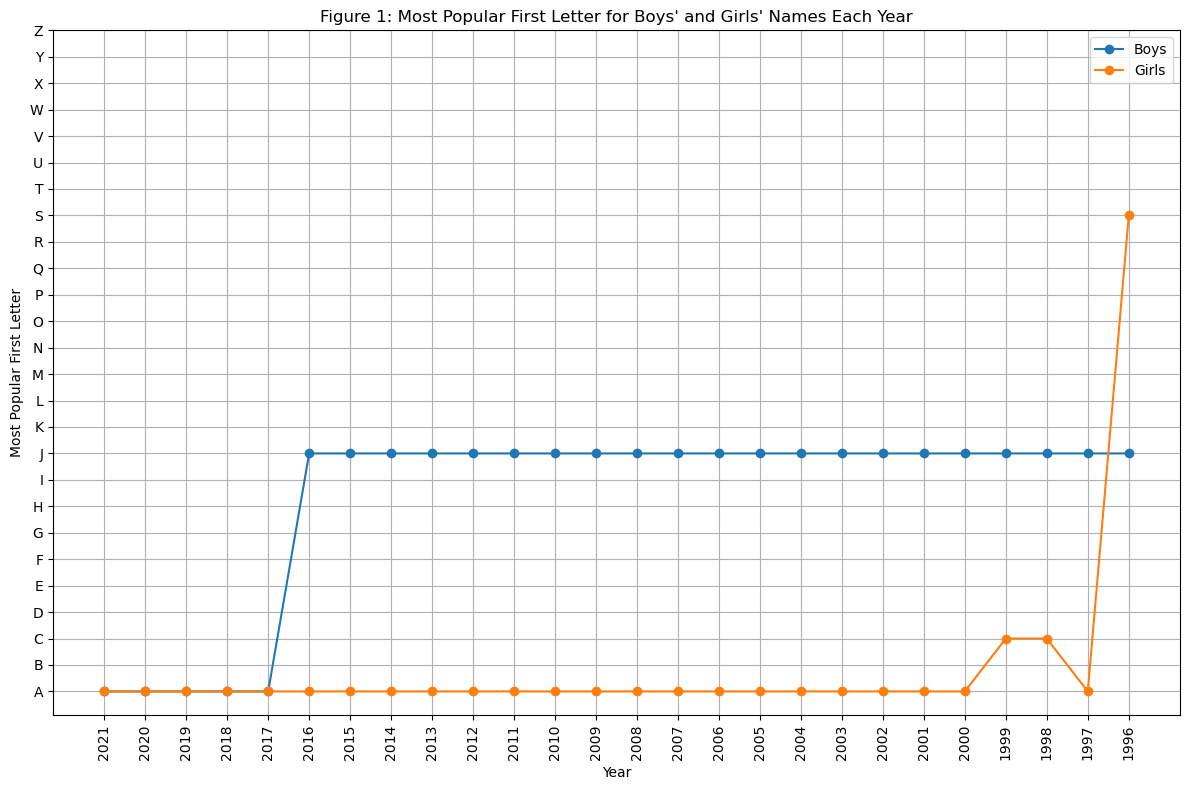

In [27]:
#We first generate a list of letters from A to Z
letters = list(string.ascii_uppercase)

#We create a plot for the data
plt.figure(figsize=(12, 8))

#Then, we plot data for boys
plt.plot(list(most_popular_letter_by_year_boys.keys()), [letters.index(letter) for letter in most_popular_letter_by_year_boys.values()], marker='o', linestyle='-', label="Boys")

#And for girls
plt.plot(list(most_popular_letter_by_year_girls.keys()), [letters.index(letter) for letter in most_popular_letter_by_year_girls.values()], marker='o', linestyle='-', label="Girls")

plt.title("Figure 1: Most Popular First Letter for Boys' and Girls' Names Each Year")
plt.xlabel("Year")
plt.ylabel("Most Popular First Letter")
plt.grid(True)
plt.yticks(range(len(letters)), letters)  #We set y-ticks to letters from A to Z
plt.legend()  #We show the legend

#We rotate x-axis labels (years) vertically
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

##### B) What names are the most popular with both boys and girls?

Our second analysis will consist of identifying the most popular names for both boys and girls. 

To do that, we first want to sum the numeric columns across each row. Please note that for this exercise, we will be using the clean_male_babynames_df2 and clean_female_babynames_df2.

In [28]:
#We sum up the numeric columns across each row
clean_male_babynames_df2['Total'] = clean_male_babynames_df2.iloc[:, 1:].sum(axis=1)
clean_male_babynames_df2

,Name,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,Total
0,A,5.0,4.0,10.0,4.0,4.0,9.0,11.0,6.0,7.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,107.0
1,A-Jay,5.0,6.0,NaN,6.0,12.0,9.0,7.0,4.0,8.0,...,8.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,113.0
2,A.J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,6.0
3,Aaban,4.0,4.0,4.0,5.0,9.0,3.0,9.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0
4,Aabid,NaN,3.0,4.0,4.0,4.0,3.0,6.0,3.0,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Zylan,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
16773,Zylus,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
16774,Zyon,17.0,15.0,14.0,9.0,5.0,6.0,4.0,5.0,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
16775,Zyren,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [29]:
#We sum up the numeric columns across each row
clean_female_babynames_df2['Total'] = clean_female_babynames_df2.iloc[:, 1:].sum(axis=1)
clean_female_babynames_df2

,Name,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,Total
0,A'Idah,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,A'Isha,3.0,NaN,10.0,NaN,4.0,9.0,11.0,9.0,5.0,...,4.0,3.0,NaN,8.0,NaN,NaN,4.0,NaN,NaN,107.0
2,A'Ishah,4.0,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,...,6.0,6.0,5.0,8.0,3.0,4.0,4.0,NaN,NaN,89.0
3,A'Niyah,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,Aa'Idah,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,Zynah,5.0,NaN,NaN,NaN,4.0,NaN,9.0,3.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
21954,Zyra,11.0,10.0,5.0,8.0,5.0,NaN,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
21955,Zyrah,3.0,4.0,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
21956,Zysha,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


Then, we want to find the most popular names for boys and the most popular names for girls.

The most popular names for boys:  

In [30]:
#We group the data by name and sum the counts across all years
boys_names_totals = clean_male_babynames_df2.groupby('Name')['Total'].sum()

#Then, we sort the names based on their total counts in descending order
sorted_boys_names = boys_names_totals.sort_values(ascending=False)

#Finally, we print the sorted boys' names with their total counts
print("Boys' names ranked by total count (highest to lowest):")
for name, total_count in sorted_boys_names.items():
    print(f"{name}: {total_count}")

Boys' names ranked by total count (highest to lowest):
Jack: 182643.0
Thomas: 155395.0
Oliver: 146458.0
Joshua: 141345.0
James: 137662.0
Harry: 135726.0
Daniel: 118043.0
William: 113115.0
George: 110808.0
Samuel: 105783.0
Joseph: 99161.0
Charlie: 98404.0
Jacob: 88723.0
Benjamin: 87397.0
Alexander: 81053.0
Alfie: 80105.0
Matthew: 79713.0
Ethan: 73842.0
Luke: 70909.0
Mohammed: 69261.0
Lewis: 68703.0
Adam: 67745.0
Ryan: 67354.0
Jake: 65896.0
Callum: 65179.0
Noah: 59489.0
Oscar: 59233.0
Dylan: 58319.0
Liam: 58263.0
Henry: 57703.0
Muhammad: 57664.0
Max: 55934.0
Leo: 52899.0
Connor: 52514.0
Archie: 52306.0
Edward: 48638.0
Nathan: 45227.0
Michael: 45214.0
Isaac: 44425.0
Lucas: 44096.0
Harrison: 42584.0
Tyler: 41385.0
Jamie: 40544.0
Cameron: 39637.0
Freddie: 39335.0
Logan: 38159.0
Finley: 36655.0
Ben: 36076.0
Jordan: 35993.0
Riley: 35942.0
Mason: 35642.0
David: 35289.0
Aaron: 35263.0
Harvey: 34223.0
Arthur: 33228.0
Theo: 32910.0
Owen: 32445.0
Louis: 32386.0
Alex: 31694.0
Charles: 31664.0
Toby:

The most popular names for girls:

In [31]:
#We group the data by name and sum the counts across all years
girls_names_totals = clean_female_babynames_df2.groupby('Name')['Total'].sum()

#Then, we sort the names based on their total counts in descending order
sorted_girls_names = girls_names_totals.sort_values(ascending=False)

#Finally, we print the sorted boys' names with their total counts
print("Girls' names ranked by total count (highest to lowest):")
for name, total_count in sorted_girls_names.items():
    print(f"{name}: {total_count}")


Girls' names ranked by total count (highest to lowest):
Emily: 117553.0
Olivia: 114149.0
Chloe: 109084.0
Jessica: 103278.0
Sophie: 100849.0
Amelia: 86819.0
Charlotte: 84446.0
Grace: 74602.0
Megan: 70604.0
Lucy: 69304.0
Hannah: 66176.0
Lily: 66084.0
Ella: 65115.0
Mia: 62078.0
Ellie: 61674.0
Ruby: 57171.0
Isabella: 53392.0
Katie: 52892.0
Amy: 52130.0
Holly: 51103.0
Lauren: 50544.0
Evie: 48808.0
Emma: 48681.0
Ava: 48408.0
Georgia: 47701.0
Poppy: 47311.0
Molly: 46178.0
Rebecca: 45344.0
Isla: 44840.0
Daisy: 44706.0
Abigail: 44561.0
Freya: 44387.0
Alice: 43845.0
Isabelle: 43249.0
Phoebe: 43016.0
Bethany: 42847.0
Sophia: 41834.0
Millie: 40089.0
Eleanor: 38354.0
Elizabeth: 37058.0
Jasmine: 33709.0
Erin: 32597.0
Leah: 32300.0
Scarlett: 32200.0
Imogen: 31513.0
Rosie: 30952.0
Amber: 30669.0
Maisie: 29565.0
Caitlin: 28773.0
Sienna: 27365.0
Florence: 27102.0
Eva: 27023.0
Sarah: 26804.0
Anna: 26568.0
Matilda: 26170.0
Shannon: 25464.0
Sofia: 24420.0
Paige: 24315.0
Courtney: 23100.0
Laura: 22829.0
Lol

Now for each of these names, we get a sample of the 500 most popular names for girls and boys. We then find the names that are both male and female, get their total count and rank them from highest to lowest. 

In [32]:
#We get the 500 most popular names for girls
top_girls_names = sorted_girls_names.head(500)

#And the 500 most popular names for boys
top_boys_names = sorted_boys_names.head(500)

#Then, we find the common names among the top 500 names for girls and boys
common_names = set(top_girls_names.index).intersection(set(top_boys_names.index))

#We create a dictionary to store the total counts for common names
total_counts = {}

#We then calculate the total counts for each common name
for name in common_names:
    girls_count = top_girls_names.loc[name]
    boys_count = top_boys_names.loc[name]
    total_counts[name] = girls_count + boys_count

#We sort the common names based on total count in descending order
sorted_common_names = sorted(total_counts.keys(), key=lambda x: total_counts[x], reverse=True)

#Finally, we print the common names ranked by total count (highest to lowest)
print("Common names ranked by total count (highest to lowest):")

for name in sorted_common_names:
    girls_count = top_girls_names.loc[name]
    boys_count = top_boys_names.loc[name]
    total_count = total_counts[name]
    print(f"{name}: Girls - {girls_count}, Boys - {boys_count}, Total - {total_count}")


Common names ranked by total count (highest to lowest):
Charlie: Girls - 7819.0, Boys - 98404.0, Total - 106223.0
Jamie: Girls - 2598.0, Boys - 40544.0, Total - 43142.0
Jordan: Girls - 3987.0, Boys - 35993.0, Total - 39980.0
Alex: Girls - 3090.0, Boys - 31694.0, Total - 34784.0
Morgan: Girls - 9533.0, Boys - 15628.0, Total - 25161.0
Harley: Girls - 2895.0, Boys - 20878.0, Total - 23773.0
Taylor: Girls - 7222.0, Boys - 13978.0, Total - 21200.0
Frankie: Girls - 5616.0, Boys - 15041.0, Total - 20657.0
Ashley: Girls - 2688.0, Boys - 12181.0, Total - 14869.0
Eden: Girls - 8758.0, Boys - 2990.0, Total - 11748.0
Casey: Girls - 6941.0, Boys - 4057.0, Total - 10998.0
Beau: Girls - 2924.0, Boys - 5326.0, Total - 8250.0
Charley: Girls - 4474.0, Boys - 1800.0, Total - 6274.0
River: Girls - 2179.0, Boys - 2455.0, Total - 4634.0


Finally, we visualise the common names and their proportion for girls names and boys names.

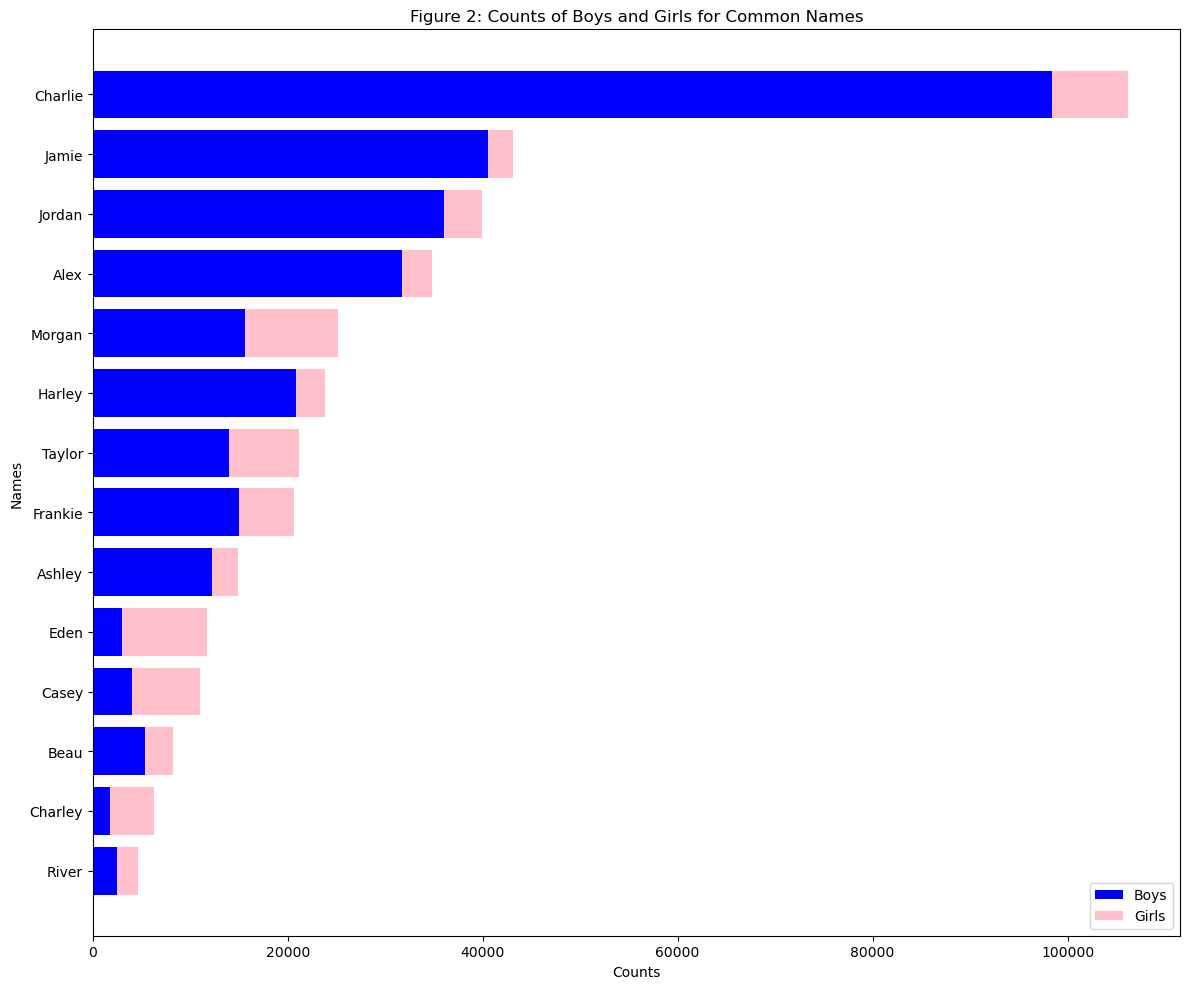

In [33]:
#We sort the common names based on total count in descending order
sorted_common_names = sorted(total_counts.keys(), key=lambda x: total_counts[x], reverse=False)

#Then we create lists to store data for plotting
names = []
girls_counts = []
boys_counts = []

#We extract counts for each common name
for name in sorted_common_names:
    names.append(name)
    girls_counts.append(top_girls_names.loc[name])
    boys_counts.append(top_boys_names.loc[name])

#Then we create a plot 
plt.figure(figsize=(12, 10))
plt.barh(names, boys_counts, color='blue', label='Boys')
plt.barh(names, girls_counts, color='pink', left=boys_counts, label='Girls')

#Add labels and title
plt.xlabel('Counts')
plt.ylabel('Names')
plt.title('Figure 2: Counts of Boys and Girls for Common Names')
plt.legend()

#To finally show the plot
plt.tight_layout()
plt.show()

#### C) From the most popular names in female and male, whose name popularity has increased or decreased in the years covered in the dataset.

Our third analysis will consist in the trends of the most popular names for both boys and girls over the years 1996 to 2021. 

First, we want to find the most 5 popular names throughout the years for boys. 

In [34]:
#We sort the dataframe based on the total counts in descending order
sorted_male_names = clean_male_babynames_df2.sort_values(by='Total', ascending=False)

#We get the top 5 most popular names
top_5_male_names = sorted_male_names.head(5)

#Then, we display the top 5 most popular names
print("Top 5 most popular names for boys:")
print(top_5_male_names[['Name', 'Total']])

Top 5 most popular names for boys:
         Name     Total
6882     Jack  182643.0
15256  Thomas  155395.0
11699  Oliver  146458.0
7768   Joshua  141345.0
7126    James  137662.0


Then, from our above sorted male dataframe, we want to extract all the count for every year for those specific 5 most popular names, while removing the total column. 

In [35]:
#We extract the top 5 rows
top_5_male_names = sorted_male_names.head(5).drop(columns=['Total'])

#We print the top 5 rows
print("Top 5 male baby names:")
print(top_5_male_names)

Top 5 male baby names:
         Name    2021    2020    2019    2018    2017    2016    2015    2014  \
6882     Jack  2847.0  2900.0  3381.0  3988.0  4190.0  4751.0  5371.0  5804.0   
15256  Thomas  2302.0  2646.0  2957.0  3243.0  3246.0  3898.0  4075.0  4405.0   
11699  Oliver  4167.0  4225.0  4932.0  5390.0  6259.0  6623.0  6941.0  6649.0   
7768   Joshua  1737.0  1989.0  2450.0  2922.0  3166.0  3495.0  3394.0  3812.0   
7126    James  1772.0  1977.0  2336.0  2536.0  2925.0  3580.0  3912.0  4167.0   

         2013  ...    2005    2004    2003    2002    2001    2000    1999  \
6882   6212.0  ...  7434.0  8380.0  9037.0  9100.0  9000.0  9079.0  9785.0   
15256  4591.0  ...  6792.0  7295.0  7213.0  7438.0  8337.0  8672.0  9454.0   
11699  6949.0  ...  5516.0  5565.0  5062.0  4794.0  4534.0  4402.0  3958.0   
7768   3973.0  ...  7167.0  7823.0  8190.0  8170.0  7182.0  7097.0  7275.0   
7126   4236.0  ...  5654.0  6135.0  6305.0  6377.0  7026.0  7489.0  8748.0   

         1998     199

Then, we visualise the trend of the most popular male names over the years 1996 to 2021. 

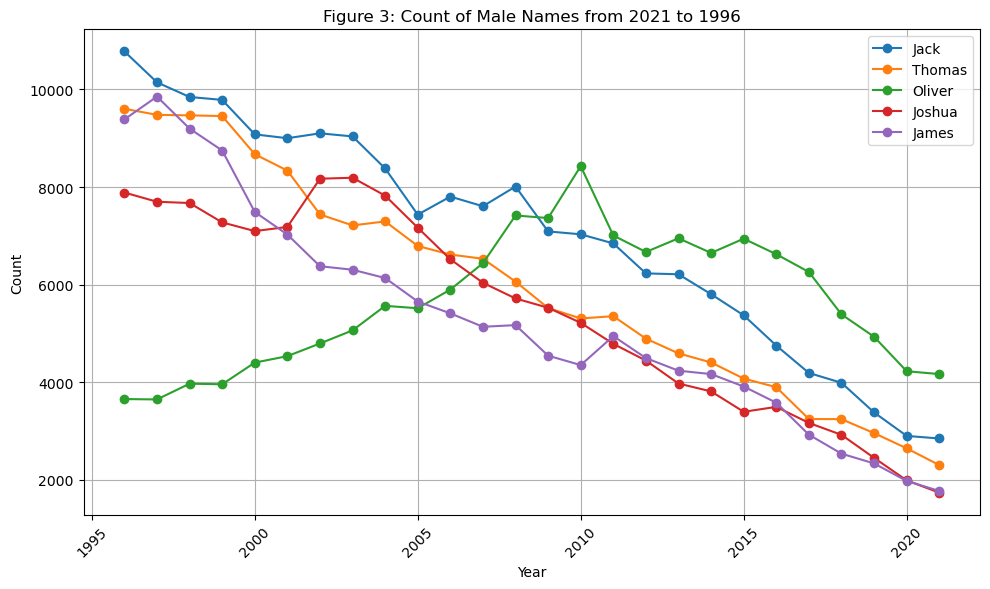

In [36]:
#We set the 'Name' column as the index
top_5_male_names.set_index('Name', inplace=True)

#We then creat a plot
plt.figure(figsize=(10, 6))
for name in top_5_male_names.index:
    plt.plot(top_5_male_names.columns.astype(int), top_5_male_names.loc[name].values, marker='o', linestyle='-', label=name)

#And add labels and legend
plt.title('Figure 3: Count of Male Names from 2021 to 1996')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finally, we calculate the popularity change for each name to understand the trend. 

In [37]:
#We iterate over the top 5 names and calculate the popularity change for each
for name in top_5_male_names.index:
    #We get the count in 2021
    count_2021 = top_5_male_names.loc[name]['2021']
    #And the count in 1996
    count_1996 = top_5_male_names.loc[name]['1996']
    #We calculate the change in popularity
    change = count_2021 - count_1996
    print(f"{name}: Change in popularity : {change}")


Jack: Change in popularity : -7932.0
Thomas: Change in popularity : -7301.0
Oliver: Change in popularity : 512.0
Joshua: Change in popularity : -6150.0
James: Change in popularity : -7613.0


Now we do the exact same process for girls name.

First, we want to find the most 5 popular names throughout the years for girls.

In [38]:
#We sort the dataframe based on the total counts in descending order
sorted_female_names = clean_female_babynames_df2.sort_values(by='Total', ascending=False)

#We get the top 5 most popular names
top_5_female_names = sorted_female_names.head(5)

#Then, we display the top 5 most popular names
print("Top 5 most popular names for girls:")
print(top_5_female_names[['Name', 'Total']])

Top 5 most popular names for girls:
          Name     Total
6239     Emily  117553.0
15560   Olivia  114149.0
4355     Chloe  109084.0
9462   Jessica  103278.0
19333   Sophie  100849.0


Then, from our above sorted male dataframe, we want to extract all the count for every year for those specific 5 most popular names, while removing the total column

In [39]:
#We extract the top 5 rows
top_5_female_names = sorted_female_names.head(5).drop(columns=['Total'])

#We print the top 5 rows
print("Top 5 female baby names:")
print(top_5_female_names)

Top 5 female baby names:
          Name    2021    2020    2019    2018    2017    2016    2015  \
6239     Emily  1797.0  1896.0  2262.0  2676.0  3121.0  3551.0  3893.0   
15560   Olivia  3649.0  3640.0  4082.0  4598.0  5204.0  5017.0  4853.0   
4355     Chloe   932.0   980.0  1183.0  1375.0  1654.0  1980.0  2158.0   
9462   Jessica   997.0  1156.0  1439.0  1812.0  2139.0  2703.0  2937.0   
19333   Sophie  1375.0  1525.0  1727.0  2007.0  2129.0  2505.0  2779.0   

         2014    2013  ...    2005    2004    2003    2002    2001    2000  \
6239   3991.0  4049.0  ...  4752.0  5399.0  5423.0  5390.0  5918.0  6232.0   
15560  4724.0  4598.0  ...  4282.0  3985.0  4024.0  3798.0  4001.0  4546.0   
4355   2215.0  2401.0  ...  4017.0  4530.0  5058.0  5708.0  6984.0  7534.0   
9462   2995.0  3507.0  ...  5030.0  4838.0  4928.0  5094.0  4888.0  4779.0   
19333  2905.0  3013.0  ...  4422.0  4670.0  4592.0  4688.0  4560.0  4624.0   

         1999    1998    1997    1996  
6239   6760.0  6550.0

Then, we visualise the trend of the most popular female names over the years 1996 to 2021. 

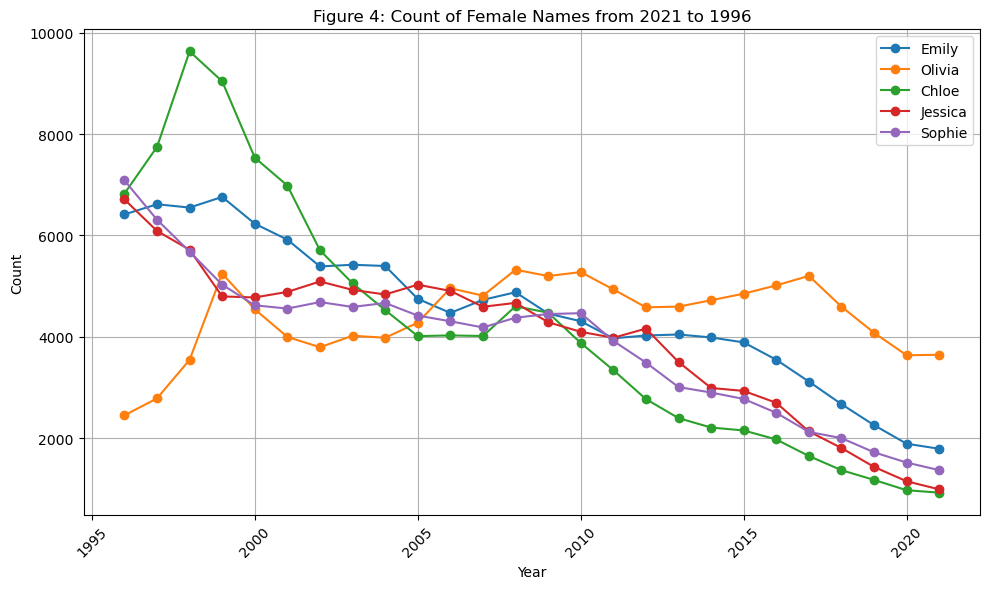

In [40]:
#We set the 'Name' column as the index
top_5_female_names.set_index('Name', inplace=True)

#We then creat a plot
plt.figure(figsize=(10, 6))
for name in top_5_female_names.index:
    plt.plot(top_5_female_names.columns.astype(int), top_5_female_names.loc[name].values, marker='o', linestyle='-', label=name)

#And add labels and legend
plt.title('Figure 4: Count of Female Names from 2021 to 1996')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finally, we calculate the popularity change for each name to understand the trend

In [41]:
#We iterate over the top 5 names and calculate the popularity change for each
for name in top_5_female_names.index:
    #We get the count in 2021
    count_2021 = top_5_female_names.loc[name]['2021']
    #And the count in 1996
    count_1996 = top_5_female_names.loc[name]['1996']
    #We calculate the change in popularity
    change = count_2021 - count_1996
    print(f"{name}: Change in popularity : {change}")


Emily: Change in popularity : -4618.0
Olivia: Change in popularity : 1193.0
Chloe: Change in popularity : -5892.0
Jessica: Change in popularity : -5714.0
Sophie: Change in popularity : -5712.0


### IV - Visualise (10 Marks)

- Use an appropriate visualisation to display your findings using a Python plotting library (such as matplotlib or seaborn). 

Please note that this has been done across the assignment. 

### V - Report (20 Marks)

#### I - Introduction:

Our project consists in providing valuable insights into naming trends in England and Wales over the past two and a half decades (1996-2021). The dataset provided by the Office for National Statistics comprises ranks and counts of baby names for both boys and girls, segregated into separate worksheets within an Excel file. In our analysis, we will firstly shed light on the methods used to load, clean and pre-process our data, then we will discuss, interpret and analyse our results to uncover trends, identify popular names, and detect any notable patterns or shifts over time. Finally, we will address the limitations of our dataset and explain how we address various issues related to data management and use, security, equality, diversity, inclusion (EDI), and sustainability. 


#### II - Methods: 

In this section, we will be explaining the different methods used for our programme solution, taking into account the nature of our data. Baby name statistics, compiled from first names recorded during live births in England and Wales, form the basis of our analysis, which relies on the precise name spelling.  These statistics are exclusive to live births within the calendar year, with stillbirths excluded. While babies born to non-resident mothers are included in the overall statistics, they are not factored into regional breakdowns. Additionally, certain exclusions and redactions are implemented to maintain confidentiality, particularly for births occurring abroad, unnamed babies, and names with low frequencies. Notably, our dataset adheres to professional standards outlined in the Code of Practice for Statistics and has been designated as National Statistics by the UK Statistics Authority (Office for National Statistics, 2022).

##### A) Data Loading: 

Before initiating our project, we imported necessary libraries like csv, pandas, seaborn, matplotlib and string. Although we planned to download our Excel file programmatically, restrictions (edit-only access) forced manual downloading.  Therefore, we saved it to our JupyterLab notebook and initiated its loading by creating a variable (file_name), which we assigned to the result of pd.ExcelFile() function with our file name "babynames1996to2021 2.xlsx". This allowed us to create our ExcelFile object, making it ready for further operations. 

##### B) Data Cleaning and Pre-processing:

1. Load data from Excel File

Before data cleaning and pre-processing, we want to load our data from the downloaded Excel file. To aaccomplish this task, we first define our “load_function”, taking excel_filename and sheet_names as arguments. Using “excel_filename”, we create an ExcelFile object (file_name) to access our dataset content. We initialize an empty dictionary, “dataframes” to store our loaded dataframes. Then, we loop over each sheet name in “sheet_names” list, and read the corresponding sheet from our “file_name”, creating a dataframe. Then, we store our the dataframe in our predefined dictionary using the “sheet_name” as the key. Finally, we return our dataframes dictionary containing our loaded dataframes. 

We then execute our load_function for our dataset, loading specific sheets from file "babynames1996to2021 2.xlsx", which includes male and female baby names. First, we assign our file to “excel_filename” and create a list “sheet_names”, containing sheet names "1" for male baby names and "2" for female baby names that we aim to load. Then, we call our “load_function” to retrieve our specified sheet into panda dataframes, storing it in “loaded_data” as a dictionary. Finally, we assign “male_babynames” and “female_babynames” variables to their respective dataframes, then print their respective first 10 rows using .head(10). This offers an overview of the loaded data for male and female baby names.

2. Combine and transform the ONS Spreadsheet into an appropriate format for analysis

Having loaded our data, we now want to split our spreadsheet into two separate CSV files. To do that,  we define our “csv_function”, which saves male and female baby names dataframes as CSV files. It takes “male_df” and “female_df” dataframes as parameters, with default filenames "male_babynames.csv" and "female_babynames.csv" respectively. The function saves “male_df” and “female_df” to CSV files, excluding the index column (index=False). We then execute our  “csv_function” specifying our dataframes “male_babynames” and “female_babynames”  to obtain our specific csv files.


3. Format any symbols used in the spreadsheet into a appropriate data formats. You must demonstrate the use of appropriate data structures and custom functions for any repeated tasks in this step. These steps should be completed by defining a class to load, clean and return the data for analysis.

Realizing our CSV files had unnecessary rows and symbols in cell values, we decide to clean them. To do that, we first define our “remove_rows” function which consists of loading our CSV files into a pandas dataframes, skipping specified rows and setting a header row. Indeed, the function takes our “filename”, “skip_rows” (a list of row numbers to skip), and “header_row” (the row number to use as the header) as parameters. If a “skip_rows”  list is provided, our code reads the CSV file, skipping those specified rows. If not, it reads the file without skipping any rows. Finally, it returns the loaded data as a dataframe. Then, we run our “remove_rows” function to obtain our trimmed dataframes. To do that, we first load male baby names from our file "male_babynames.csv", skipping the first 7 rows and storing the result in “male_babynames_df". Similarly, we do this for our "female_babynames.csv". Lastly, we print a message indicating the displayed data after row skipping, followed by our “male_babynames_df” and “female_babynames_df”.

Realizing "[x]" symbols which represent “not available data” are present in our cell values, we aim to replace them with 'NaN' and convert all columns (excluding the first one) to numeric. Please note that we have conducted an investigation for the presence of “[z]” symbols across both sheets and none were found. To do that, we define our “clean_dataframe” function, which performs the above operations. Indeed, it first replaces '[x]' with 'NaN' using the replace method with regex=True parameter, which interprets the pattern as a regular expression, enabling more flexible and powerful pattern matching capabilities. Then, our resulting dataframe, “cleaned_df”, selects all columns except the first by using .iloc[:, 1:] and applies pd.to_numeric to convert them to numerical values. Please note that the parameter errors='coerce' specifies that any non-convertible values should be set to NaN, ensuring that only numeric values are retained in those columns. Finally, the function returns our “cleaned_df”. Then, we call our “clean_dataframe” function on our existing “male_babynames_df” and “female_babynames_df”, storing the cleaned results in “clean_male_babynames_df” and “clean_female_babynames_df”.

Finally, we realised that each year has two corresponding columns: one for rank and one for count. We decide to drop rank columns and remove the ‘count’ word from all remaining columns. To achieve this, we define our “process_dataframe” function. It consists in taking a dataframe as input and creating new “processed_df” by iterating through column names and dropping those containing the 'Rank' word. Then, it splits each remaining column name by whitespaces using the split() method, and retains only the year part. Modified column names are assigned back to the “processed_df.columns”. and “processed_df” is returned. We finally call our “process_dataframe” function on our existing “clean_male_babynames_df” and “clean_female_babynames_df” dataframes, creating new “clean_male_babynames_df2” and “clean_female_babynames_df2” dataframes, free from 'Rank' columns and ‘count’ word.


##### C) Data Analysis:

1. What is the most popular first letter for baby names, does it change over time?

Our first analysis consists in identifying the most popular first letter for baby names and understand whether it changes over time.

To do that, we first group the boys and girls names by letter. We initialize an empty dictionary, “boysnames_by_first_letter”, to store our grouped data. Using “clean_male_babynames_df2”, we group boys' names by their first letter using the groupby() function along with str[0] to extract the first character of the 'Name' column. Then, we iterate over our grouped data, storing each group of names starting with a particular letter in the “boysnames_by_first_letter” dictionary. In another loop, we print key-value pairs for each group. Similar steps are used for girls' names.

Then, we group the above data by year, providing counts of names starting with each letter for each year from 1996 to 2021. To do that, we first initialize an empty dictionary to store the total counts of boys' names for each letter and year. Using a loop over our “boysnames_by_first_letter” dictionary, we iterate through our dataframes columns, excluding the 'Name' column. For each year, we calculate the total count of names and store it in our “boys_total_counts_by_year”. Then, we store this information in our “boys_total_counts_by_letter_and_year”, with keys as first letters and values as dictionaries of counts for each year. Finally, we loop through this dictionary, printing the first letter followed by the “boys_total_counts_by_year” for each year, while adding a newline for readability. Similar steps are used for girls' names.

Then, we identify the most popular first letter for boys' and girls’ names per year. To do that, we first initialize an empty dictionary, “most_popular_letter_by_year_boys”, to store the most popular letter for each year for boys. Then, we iterate over the years, using max function on our “boys_total_counts_by_letter_and_year” dictionary and .items() to extract the total counts for the current year with a lambda function. The found letter is stored in our “most_popular_letter_by_year_boys” dictionary with the year as key. Finally, we loop through this dictionary, printing the year and its most popular first letter for boys' names. Similar steps are followed for girls' names.

Finally, we visualise both data in a single graph. To do that, we begin by generating a list of uppercase letters from A to Z using string.ascii_uppercase. Then, we create a figure where we plot the trends for boys' and girls' names, using years from our “most_popular_letter_by_year_boys” and “most_popular_letter_by_year_girls” as x-axis values, and converting corresponding letters to their indices in the letters list for y-axis values. Circular markers (marker='o') and solid lines (linestyle='-') are used and labels are assigned for the legend. Then, we set the title, and labels for x and y axes, add a grid, set y-ticks to letters from A to Z, and rotate x-axis labels for better readability. The legend is then added to the plot,  indicating which line corresponds to boys' and girls' names. 



2. What names are the most popular with both boys and girls?

Our second analysis will consist of identifying the most popular names for both boys and girls.

To do that, we first want to sum the numeric columns across each row. Please note that for this exercise, we will be using the “clean_male_babynames_df2” and “clean_female_babynames_df2”. Our first code operates on the dataframe “clean_male_babynames_df2”, adding a new column named 'Total' which consists in calculating the sum, using the sum() function across each row (axis=1) for all numeric columns except the first one (iloc[:, 1:]). Finally, we display the modified dataframe with the 'Total' column added. Similar steps are used for girls' names.

Then, we want to find the most popular names for boys and the most popular names for girls. To do that, we group boys' names by name ('Name' column) and calculate the sum of the 'Total' column for each name. Names (indices) are then sorted based on total counts (values) in descending order, creating a new series. Finally, a loop prints each name along with its total count in descending order. Similar steps are used for girls' names.

Next, for each of these names, we aim to identify common names among the 500 most popular names for boys and girls. Please note that we have chosen a sample of 500 to avoid processing the entire dataset, ensuring balanced representativeness and computational efficiency while providing insights into prevalent naming trends. To do that, we select the top 500 names for boys and girls from their sorted lists. We then find common names among these lists using intersection () function, calculate total counts for each common name by summing counts for girls and boys names, and sort them based on total counts in descending order. Finally, we print common names along with their counts for girls, boys, and total count, ranked by total count from highest to lowest.

Finally, we visualise the common names and their proportion for boys and girls names. To do thatwe sort common names based on total count in ascending order (reverse=False), initializing lists for names, girls' counts, and boys' counts. Then, from the sorted list, we extract the count for each common name and append it to their respective lists. After that, we create a plot figure with specified size. Horizontal bars are plotted for boys' counts, colored in blue and labeled "Boys". Similarly, bars are plotted for girls' counts, colored in pink and labeled "Girls". By setting left=boys_counts, we ensure that the girls' bars are stacked next to the boys' bars. Axes labels and a legend are added for clarity, indicating counts (x-axis) and names (y-axis). 



3. From the most popular names in female and male, whose name popularity has increased or decreased in the years covered in the dataset.

Our third analysis will consist in the trends of the most popular names for both boys and girls over the years 1996 to 2021.

First, we want to find the top 5 most popular names for boys throughout the years. To do that, we sort our  “clean_male_babynames_df2” based on total counts in descending order and extract the top 5 names using the head() function. Finally, we display these names along with their total counts.

Then, from our above sorted male dataframe, we extract all the count for every year for those specific 5 most popular names, while removing the total column. To do that, we select the top 5 rows from our “sorted_male_names” dataframe using head(5), then drop the 'Total' column using drop(columns=['Total']) function. Finally, we print our top 5 male baby names along with their corresponding data.

Then, we visualise the trend of the top 5 male names from 1996 to 2021. To do that, we set the 'Name' column as the index of the dataframe “top_5_male_names” using set_index(), then create a line plot for each of the top 5 names over the years. For each name, we plot the count values across the years with circular markers ('o') and lines ('-'). Finally, we add a title, axis labels, a legend, and a grid for better readability.

Finally, we calculate the popularity change for each name to track trends. We iterate over our “top_5_male_names”, retrieving counts for 2021 and 1996 using .loc[] indexing, and substract the 1996 count from the 2021 count to calculate the popularity change. Finally, we print the name along with the calculated change.

The same process is done for girls name.

#### III - Discussion and Results: 

##### A) Graphs interpretation: 

1. What is the most popular first letter for baby names, does it change over time?

In Figure 1, we observe a notable shift in the most popular first letters for boys' and girls' names in the UK over time. From 1996 to 2016, boys' names predominantly started with the letter ‘J’. However, between 2017 and 2021, there was a noticeable transition, with the letter ‘A’ becoming the most common first letter. In contrast, girls' names exhibited more variability. In 1996, the leading first letter was ‘S’, which changed to ‘A’ in 1997. This pattern shifted again in 1998 and 1999, with ‘C’ emerging as the predominant first letter. From 2000 to 2021, ‘A’ regained its position as the most popular first letter for girls' names.

These trends provide valuable insights into the evolving naming preferences in the UK. The fluctuation in boys' names from ‘J’ to ‘A’ suggests evolving societal or cultural shifts, potentially influenced by factors such as popular culture, celebrity names, or increasing diversity within UK society (Logowski, n.d). For instance, names like ’Jacob’ and ‘James’ may have been associated with traditional masculinity,  while names beginning with A, such as ‘Ali’ and ‘Ahmad’ might have gained prominence due to cultural associations during the latter period, representing a more diverse and inclusive view of masculinity. In girls' names, the fluctuating trends present a dynamic picture, reflecting broader diversity in naming patterns, influenced by various factors such as cultural shifts, historical events (royal weddings) or cultural movements, and evolving naming conventions (Bush et al., n.d). The resurgence of ‘A’ from 2000 to 2021 may indicate a return to traditional naming preferences or reflect broader societal trends. For example, names like ‘Amelia’ may reflect a preference for classic and feminine names or be influenced by cultural movements, such as the popularity of the French indie movie "Amelie", starring Audrey Tautou, released in 2001 (Stigsdotter I.M.,2008). This trend may also align with broader societal preferences, as the movie appealed to a significant socio-economic demographic. Conversely, names like ‘Avery’ may represent a shift towards contemporary gender-neutral or nature-inspired name.

Please note that over the past 25 years, the letter 'A' has been the most popular choice for baby names, with 5100 occurrences across both boys and girls, coinciding with its overall popularity trend. Among girls, 'A' has consistently been the top choice for 22 years, while for boys, it emerged as the most popular letter only in the last 5 years, coinciding with its popularity among girls during the same period.


2. What names are the most popular with both boys and girls?

In our Figure 2, we observe that ‘Charlie’ emerges as one of the most common names for both boys and girls from 1996 to 2016. Notably, it was predominantly used for boys, with a count of 98,404 compared to 7,819 for girls, resulting in a total count of 106,223. This  difference in usage between genders highlights the name's greater popularity among boys during this period. Names like ‘Jamie’, ‘Jordan’, and ‘Alex’ also appear as some of the most common unisex names during this timeframe, with relatively high total counts indicating widespread usage across genders. Moreover, names such as ‘Morgan’, ‘Taylor’, and ‘Frankie’ show considerable popularity but exhibit a more balanced distribution between boys and girls, suggesting they are perceived as equally suitable for either gender, which might contribute to their appeal among parents. Interestingly, other names like ‘Ashley’ and ‘Beau’ are more commonly associated with one gender over the other. Additionally, historically popular names like ‘Jamie’, ‘Jordan’, ‘Frankie’, ‘Beau’, and ‘River’ are more commonly associated with boys than girls, although today names like ‘Alex’, ‘Morgan’, ‘Taylor’, and ‘Ashley’ have a more feminine connotation.

These trends reflect broader societal shifts in naming practices. According to Strong (2023), the rise of unisex or gender-neutral names is linked to a growing emphasis on gender equality and diversity in modern society. Names like ‘Charlie’, ‘Jamie’, and ‘Jordan’ embody this trend, as they are widely embraced by parents seeking names that transcend traditional gender boundaries. As noted by Pilcher (2017), the choice of a child's name has become a significant aspect of parental identity and values, with many parents opting for names that reflect their progressive outlook on gender and identity. Moreover, our results align with research by Edwards (2016), who suggests that names with strong masculine associations often dominate in unisex naming trends. The popularity of ‘Charlie’ among boys may be influenced by cultural norms and societal expectations regarding masculinity. Similarly, names like "Jamie" and "Jordan" demonstrate cultural shifts towards inclusivity, as noted by studies from Pilcher (2017), which indicate that parents increasingly opt for names that are perceived as versatile and adaptable, allowing children to express their identity freely. However, the findings also reveal nuanced variations in naming preferences. Names like ‘Morgan’, ‘Taylor’, and ‘Frankie’ demonstrate more balanced distributions between boys and girls, suggesting a higher degree of gender neutrality. This mirrors findings by Bologna (2022), who argues that names with ambiguous gender associations are becoming increasingly favoured by parents seeking to challenge traditional gender norms.


3. From the most popular names in female and male, whose name popularity has increased or decreased in the years covered in the dataset. 

In our Figure 3, we notice that over the years, Jack's name popularity steadily declined, with a notable decrease of 7932 occurrences. Initially peaking at around 11,000 instances in 1996, the name gradually declined to approximately 3,000 occurrences by 2021. Similarly, ‘Thomas’ and ‘James’ followed a similar pattern, experiencing a comparable decrease of 7301 and 7613 occurrences respectively over the same period. On the other hand, ‘Joshua’ showed fluctuations in popularity, with a decrease of 6150 occurrences. While there was a slight decline from 1996 to 2001, occurrences peaked slightly above 8,000 in 2002 and 2003 before declining again to less than 2,000 occurrences by 2021. In contrast, ‘Oliver’ experienced a rise in popularity, with an increase of 512 occurrences. Initially registering less than 4,000 instances in 1996, the name saw a notable surge to over 8,000 occurrences in 2010 before gradually declining to just above 4,000 occurrences by 2021.

The shifts in popularity of these names reflect various factors shaping naming trends. Traditional names such as ‘Jack’ and ‘James’ may have declined due to changing cultural preferences, as parents opt for more unique or modern options for their children (Bologna, 2022). Fluctuations in Joshua's popularity could be influenced by media coverage or associations with prominent figures Person (2022), while Oliver's rise may be linked to celebrity influence, such as the popularity of chef Jamie Oliver in 2010 which could have positively influenced perceptions of the name among parents. Overexposure to traditional names like ‘Jack’ and ‘James’ may have contributed to their decline, as parents seek more distinctive choices (Bologna, 2022), or to avoid frequent confusion in public spaces whenever parents shout their kids name. Similarly, names like ‘Thomas’ and ‘Jamie’, experiencing similar declines, may reflect cyclical naming trends, with preferences shifting over time (University of Edinburgh, n.d).  Indeed, these names, popular in previous generations, may have experienced declines as new naming trends emerged. 

In our Figure 4, we notice that over the years, ‘Chloe’ stands out for experiencing the most significant decline in popularity, despite starting with approximately 7,000 occurrences in 1996. It reached its peak in 1998, with just under 10,000 occurrences, but then sharply dropped to around 4,000 occurrences from 2005 to 2007, before plummeting to just under 1,000 occurrences by 2021. Then, ‘Sophie’ which held the top spot in 1996 with around 7,000 occurrences experienced a sharp decline to approximately 1,000 occurrences by 2021. ‘Jessica’ followed a similar trajectory, starting with roughly 6,500 occurrences in 1996 and steadily declining to just under 1,000 occurrences by 2021.  ‘Emily’ also experienced a significant decrease in popularity, starting as the second least popular name in 1996 with just over 6,000 occurrences and dropping to just under 2,000 occurrences by 2021, making it the second most popular name. Finally, ‘Olivia’ witnessed the most substantial increase in popularity, starting with approximately 2,500 occurrences (the least popular) in 1996, peaking at just under 6,000 occurrences in 2017, and slightly declining in 2021 to just under 4,000 occurrences, thereby becoming the most popular name.

The significant decrease in popularity observed for names like Emily's, Sophie's, Jessica's and Chloe’s reflects a shift in naming trends over the years, indicating a notable change in societal preferences. This shift may be influenced by various factors, including changes in cultural tastes, the emergence of new naming trends, and evolving perceptions of certain names, mirroring a societal movement towards embracing diversity and individuality. Notably, a study suggests that naming trends are often cyclical, with certain names falling in and out of favor over time (University of Edinburgh, n.d), aligning with broader societal movements. Indeed, according to Bush et. al (n.d), naming trends often reflect broader societal shifts and changing cultural preferences, suggesting that the rise of alternative names could have overshadowed the above appeal. On the other hand, Olivia's remarkable increase in popularity highlights the dynamic nature of naming trends. Despite starting as one of the least popular names in 1996, ‘Olivia’ experienced a significant surge in popularity, peaking multiple times over the years. This surge may be attributed to various factors, including the influence of popular culture, celebrity associations, and shifts in societal preferences towards classic and elegant names. Indeed, the fluctuating popularity of ‘Olivia’ coincides with the release of popular TV series featuring characters named Olivia, such as Olivia Pope from "Scandal". In fact, Person (2022) suggests that popular culture, including celebrities and fictional characters, can have a significant impact on naming trends. Actress Kerry Washington's portrayal of the strong and influential woman may have elevated the name Olivia's appeal among parents. Moreover, Olivia's significant increase in popularity also suggests a shift towards classic and timeless names, influenced by cultural movements advocating for simplicity and tradition. For example, the resurgence of vintage names in popular culture, such as characters in period dramas or literature, could contribute to Olivia’s rise in popularity. 

##### B) Data Management and Use:

Effective data management practices are crucial for maintaining the integrity, accessibility, and usability of datasets, particularly in projects involving baby names. To ensure data integrity, our code employs non-editable Excel files for data storage, minimizing the risk of accidental or intentional modifications (Microsoft Support, no date). This approach safeguards the dataset's integrity, preserving its accuracy over time. Furthermore, structured data handling techniques, such as pandas dataframes, are utilized to efficiently manage and analyze the data, enabling organized manipulation and streamlined analytical tasks. However, it is important to acknowledge potential limitations in our dataset, such as errors or inconsistencies in name spellings and counts. These issues could impact the accuracy of analyses and interpretations. To address this, data cleaning and validation techniques are proposed, including verifying counts, and resolving inconsistencies. Moreover, transparency about data collection methods is essential for building trust in the dataset's reliability and validity. However, in our case, we do not have any information about the facilities that collected the data, nor whether they are similar throughout the years. Detailed documentation about data collection sources, methods, and limitations should be provided to us. This transparency allows us to assess the dataset's quality and suitability for our analyses effectively. 


##### C) Security:

Moreover, the code employed in our project does not involve sensitive or personally identifiable information (PII), thereby reducing potential privacy and security concerns associated with handling such data. This proactive measure aligns with ethical principles and regulatory requirements governing data privacy and security. However, it is crucial to recognize ethical concerns about privacy and data usage, especially with PII or sensitive demographic data (Jayan, 2024). To address this, it is vital to follow data privacy regulations and ethical standards, including obtaining consent, anonymizing sensitive data, and implementing strong data protection measures (World Bank, n.d). Ensuring dataset security is crucial for safeguarding sensitive information and preserving trust. Encryption, access controls, authentication measures, and regular security audits are essential for mitigating risks and complying with data protection regulations (Opswat, n.d).

##### D) Equality, Diversity, and Inclusion (EDI):

Our code exemplifies inclusivity by impartially analyzing baby name data across genders, avoiding bias towards any specific demographic group, and offering insights into naming trends without perpetuating stereotypes (Engler et al., 2023). By spanning multiple years, it captures diverse naming preferences, reflecting the cultural and societal diversity within the UK. However, the dataset's lack of information on data collection sources raises concerns about potential sampling bias, where certain names or demographics may be overrepresented or underrepresented. To address this, employing random or stratified sampling methods and conducting sensitivity analyses can help reduce bias and ensure a more representative sample (Cleave, 2023). Promoting equality in data representation involves conducting intersectional analyses, disaggregating data by demographic variables, and ensuring equitable representation of diverse populations. Embracing diversity in data collection entails engaging with community stakeholders, involving underrepresented groups, and promoting culturally sensitive practices to capture the richness of naming traditions across diverse communities. 


##### E) Sustainability Issues:

Our code acknowledges potential limitations in the data collection process, such as missing names, counts, or spelling variations, which may introduce uncertainty into the analysis but also underscores the importance of considering data reliability (Bhandari, 2022). To address sustainability concerns, incorporating data validation techniques can help identify and rectify inconsistencies or errors, thereby enhancing data accuracy and completeness (FasterCapital, n.d). Indeed, according to Al Kez  et al. (2022) ensuring the sustainability of data collection efforts involves adopting methods to minimize redundancy, optimize storage infrastructure, and foster collaborative partnerships with stakeholders. Our dataset's limitations may arise from various factors, including biases, inaccuracies, or inconsistencies in data sources and collection practices. Comprehensive audits of data collection processes, standardized protocols, and advanced cleaning techniques can help mitigate these limitations. Moreover, changes in data collection practices over time may introduce temporal trends or biases, affecting result comparability. 


#### IV - Conclusion:

In conclusion, our project offers valuable insights into naming trends in England and Wales over the past 25 years. Through comprehensive data processing and analysis, we uncovered notable patterns and shifts in baby naming practices, providing a nuanced understanding of societal preferences, cultural influences and historical factors. Our analysis highlights dynamic trends in the most popular first letters for baby names, reflecting evolving societal norms and cultural dynamics. Additionally, our analysis of popular names reveals the diversity of naming practices, showcasing the interplay between tradition, modernity, and gender inclusivity. Furthermore, our examination into specific name popularity changes provides insights into the factors driving naming trends, such as cultural influences and societal shifts. Throughout our analysis, we prioritize data management, security, equality, diversity, inclusion, and sustainability, upholding ethical standards in data science and ensuring meaningful insights. By elucidating the complexities of baby naming, we provide a foundation for further research and discourse on identity, culture, and social dynamics in contemporary society.

#### V – References: 

1. Al Kez, D. et al. (2022) Exploring the sustainability challenges facing digitalization and internet data centers, Journal of Cleaner Production. Available at: https://www.sciencedirect.com/science/article/pii/S0959652622032115 (Accessed: 19 April 2024).

2. Bhandari, P. (2022) Missing data: Types, explanation, & imputation, Scribbr. Available at: https://www.scribbr.co.uk/stats/missing-values/ (Accessed: 19 April 2024).

3. Bologna, C. (2022) Why parents are more creative with girl names than boy names, Yahoo! Available at: https://uk.movies.yahoo.com/theres-reason-parents-more-creative-202252106.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABNiY86W0hRL2S5GoiqR91HPsLsuHj3lbEGyDNmZ3kJhZZETQWLJoKkPq_IqGXJxsgcTXWmQ870aL6UdI7tmoJikeuYjlt6Qchq6VTUHfbm8wSw6OMtRy1jrenw3nzIdNTcbVKXtGY6T5lCNHj1tHfsE_RKJ9ijBP_XmW74FPapX (Accessed: 19 April 2024).

4. Bush, S.J., Powell-Smith, A. and Freeman, T.C. (no date) Network analysis of the social and demographic influences on name choice within the UK (1838-2016), PLOS ONE. Available at: https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0205759 (Accessed: 19 April 2024).

5. Cleave, P. (2023) Representative sample: Exploring why it’s essential to surveys turn survey data into actionable insights with dashboards and sentiment analysis, SmartSurvey. Available at: https://smartsurvey.co.uk/blog/representative-sample-why-its-essential-to-surveys#:~:text=If%20you’re%20looking%20for,specific%20demographics%20within%20the%20population. (Accessed: 19 April 2024).

6. Edwards, K. (2016) The subconscious bias of ‘unisex’ baby name trends, The Sydney Morning Herald. Available at: https://www.smh.com.au/lifestyle/life-and-relationships/the-subconscious-misogyny-of-unisex-baby-name-trends-20160119-gm9cay.html (Accessed: 19 April 2024).

7. Engler, A. et al. (2023) Algorithmic bias detection and mitigation: Best practices and policies to reduce consumer harms, Brookings. Available at: https://www.brookings.edu/articles/algorithmic-bias-detection-and-mitigation-best-practices-and-policies-to-reduce-consumer-harms/ (Accessed: 19 April 2024).

8. FasterCapital (no date) Data validation: Data validation and data verification for Business Data Privacy. Available at: https://fastercapital.com/content/Data-validation--Data-Validation-and-Data-Verification-for-Business-Data-Privacy.html (Accessed: 19 April 2024).

9. Jayan, J. (2024) Ethics in data collection: A priority for PromptCloud, PromptCloud. Available at: https://www.promptcloud.com/blog/importance-of-ethical-data-collection/ (Accessed: 19 April 2024).

10. Logowski (no date) The evolution of naming: A journey through history. Available at: https://logowski.com/blog/evolution-and-significance-of-naming-across-the-ages (Accessed: 19 April 2024).

11. Microsoft Support (no date). Restrict changes to files in Excel. Available at: https://support.microsoft.com/en-gb/office/restrict-changes-to-files-in-excel-021f1709-1ff6-48ec-bc4e-b23729db28f6 (Accessed: 19 April 2024).

12. Office for National Statistics (2022) Baby names in England and Wales: from 1996. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesinenglandandwalesfrom1996 (Accessed: 19 April 2024).

13. Opswat (no date) Cybersecurity compliance - what every business should know. Available at: https://www.opswat.com/blog/cybersecurity-compliance (Accessed: 19 April 2024).

14. Pankaj (2022) Python string module, DigitalOcean. Available at: https://www.digitalocean.com/community/tutorials/python-string-module (Accessed: 19 April 2024).

15. Person (2022) From star wars to the Kardashians: The cultural influences that could be driving baby name trends, Office for National Statistics. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/articles/fromstarwarstothekardashianstheculturalinfluencesthatcouldbedrivingbabynametrends/2022-10-05 (Accessed: 19 April 2024).

16. Pilcher, J. (2017) Names and ‘doing gender’: How forenames and surnames contribute to gender identities, difference, and inequalities, Sex roles. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5700988/ (Accessed: 19 April 2024).

17. Python documentation (2024) CSV - csv file reading and writing . Available at: https://docs.python.org/3/library/csv.html (Accessed: 29 February 2024).

18. Seaborn documentation (2024) An introduction to seaborn. Available at: https://seaborn.pydata.org/tutorial/introduction.html (Accessed: 29 February 2024).

19. Stigsdotter, I.M. (2008) British Audiences and Approaches to European Cinema: Four Case Studies of Responses to French and Swedish Film in the UK Today Two Volumes: Vol. I. dissertation.

20. Strong, G. (2023) Unisex baby girl name skyrockets in popularity as parents lean into trend, The Mirror. Available at: https://www.mirror.co.uk/news/weird-news/unisex-baby-girl-name-skyrockets-31111568 (Accessed: 19 April 2024).

21. University of Edinburgh (no date). "Baby-naming trends reveal ongoing quest for individuality." ScienceDaily. ScienceDaily, 31 October 2018. <www.sciencedaily.com/releases/2018/10/181031141434.htm>.

22. W3 School (2024) Pandas Getting Started. Available at: https://www.w3schools.com/python/pandas/pandas_getting_started.asp (Accessed: 29 February 2024).

23. World Bank (no date) Data protection and privacy laws | Identification for Development. Available at: https://id4d.worldbank.org/guide/data-protection-and-privacy-laws (Accessed: 19 April 2024).